##### Copyright 2025 Google LLC.

In [2]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai>=1.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 kB 18.0 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [22]:
from google.colab import userdata
userdata.get('GOOGLE_API_KEY_1')

GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')


### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [23]:
from google import genai
from google.genai import types


client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [25]:
MODEL_ID = "gemini-2.5-pro" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash-lite-preview-09-2025", "gemini-2.5-flash", "gemini-2.5-flash-preview-09-2025", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [26]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

It's a gas giant so massive that its mass is more than two and a half times that of all the other planets in our solar system combined. To give you a sense of its scale, you could fit about 1,300 Earths inside it

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [27]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini model, a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [28]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

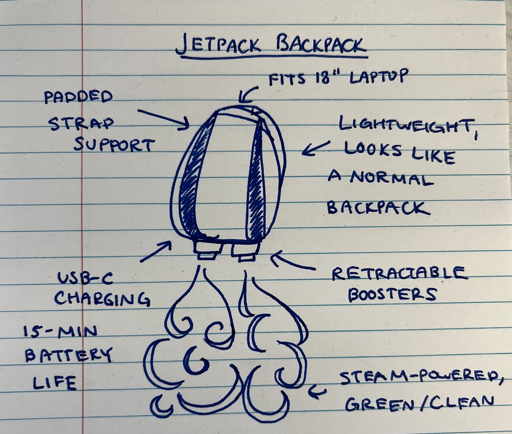

Of course! Here is a short blog post inspired by the image.

***

### Your Morning Commute is About to Get a Serious Upgrade

Tired of traffic? Sick of the crowded subway? We've all dreamed of a better way to get from A to B, and this brilliant sketch might just be the blueprint for the future of personal travel.

Meet the **Jetpack Backpack**.

At first glance, it’s everything you need for your daily grind. It’s lightweight, features padded strap support for comfort, and has enough room to fit an 18-inch laptop. It looks just like a normal, stylish backpack you'd take to the office or campus.

But this is where the ordinary ends.

With the flick of a switch, hidden, **retractable boosters** emerge. Powered by clean, green steam technology, this backpack can lift you off the ground and send you soaring over the gridlock below. And don't worry about finding a special charging station; it's powered by a battery with a 15-minute flight time that charges with a standard **USB-C cable**.

This concept brilliantly merges sci-fi fantasy with everyday practicality. It’s the ultimate stealth-tech for the modern commuter: a device that carries your work and *is* your wings.

The only question is, where would you fly first?

In [29]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [30]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

*Woof!* Okay, little fuzzy friend! Settle down, wiggle your tail. Let's talk about the Big Squeak Network, what the humans call "the internet."

Imagine the whole world is one giant dog park.

**1. You Want a Squeaky Toy!**

You're sitting on your favorite comfy dog bed (that's your computer or your human's phone). Suddenly, you want a very specific toy. Not just any toy, you want the **Red Squeaky Ball** (that's a website, like a fun page with pictures of other dogs).

**2. The Special Bark (Your Request)**

To get the Red Squeaky Ball, you let out a special bark: "*Woof-woof-squeak-ball!*" This bark goes into the **Magic Tunnel Box** in your house (that's your Wi-Fi router).

**3. The Tunnels (The Internet)**

The Magic Tunnel Box takes your bark and sends it into a giant, invisible network of tunnels that go all over the world-park. Your bark zips through these tunnels, super-fast!

**4. The Big Toy Box (The Server)**

Your bark travels through the tunnels until it finds the **Giant Toy Box** where the Red Squeaky Ball lives. This Toy Box is very far away, but the tunnels are so fast it only takes a blink! The Big Toy Box hears your bark and knows *exactly* which toy you want.

**5. Breaking the Toy (Packets)**

Now, here's the clever part. The Red Squeaky Ball is too big to fit through the tunnels all at once. So, the Big Toy Box breaks it into a thousand tiny little squeaky pieces. We'll call them **Squeaky Bits**. Each Squeaky Bit has a little tag on it that says, "This goes back to the good puppy on the comfy dog bed!"

**6. The Fetch! (The Response)**

The Big Toy Box throws all the Squeaky Bits into the tunnels. *WHOOSH!* They all race back towards you. They might take different tunnels, but they all know where they're going because of their little tags.

**7. Putting it Back Together! (Loading the Page)**

Your Magic Tunnel Box and your comfy dog bed catch all the Squeaky Bits as they arrive. They quickly put them all back together in the right order... *click, snap, squeak!*

**POP!**

Suddenly, the whole Red Squeaky Ball appears right in front of you! You can see it, you can "squeak" it (by clicking on things), and you can play!

So, the internet is just a giant, super-fast game of fetch! You bark for a squeak, and lots of tiny pieces of that squeak zoom through magic tunnels to bring it right to your bed!

Good boy! You get it! Now, who's a smart puppy? You are! *Woof!*

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [31]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Of course. Here are two disrespectful things you might say to the universe in that moment of agony:

1.  "Really? Of all the cosmic events you could orchestrate, you chose to personally victimize my pinky toe? You're not profound, you're just a petty, sadistic hack."
2.  "Oh, bravo! A masterstroke of universal design! You can create supernovas, but you still get your kicks from a coffee table leg in the dark. Your priorities are a mess."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [33]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [34]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Of course! Here is a function to check for a leap year, with explanations and examples in several popular programming languages.

### The Rules for a Leap Year

A year is a leap year if it meets the following criteria:

1.  The year is evenly divisible by 4.
2.  **However,** if the year is also evenly divisible by 100, it is **not** a leap year.
3.  **Unless,** the year is also evenly divisible by 400. In that case, it **is** a leap year.

This logic can be combined into a single boolean expression:
` (year is divisible by 4 AND not divisible by 100) OR (year is divisible by 400) `

---

### Python

This is a very common and elegant way to write the function in Python, using a single boolean expression.

```python
def is_leap(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    Args:
        year: The year to check (as an integer).

    Returns:
        True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Example Usage ---
print(f"2024: {is_leap(2024)}")  # Expected: True (divisible by 4)
print(f"2023: {is_leap(2023)}")  # Expected: False
print(f"1900: {is_leap(1900)}")  # Expected: False (divisible by 100 but not 400)
print(f"2000: {is_leap(2000)}")  # Expected: True (divisible by 400)

# Alternative (more verbose) implementation using if/elif/else
def is_leap_verbose(year: int) -> bool:
    if year % 400 == 0:
        return True
    if year % 100 == 0:
        return False
    if year % 4 == 0:
        return True
    return False
```

---

### JavaScript

The logic is identical to the Python version. This example shows an arrow function, which is a modern and concise syntax.

```javascript
/**
 * Checks if a given year is a leap year.
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, false otherwise.
 */
const isLeap = (year) => {
  return (year % 4 === 0 && year % 100 !== 0) || year % 400 === 0;
};

// --- Example Usage ---
console.log(`2024: ${isLeap(2024)}`); // Expected: true
console.log(`2023: ${isLeap(2023)}`); // Expected: false
console.log(`1900: ${isLeap(1900)}`); // Expected: false
console.log(`2000: ${isLeap(2000)}`); // Expected: true
```

---

### Java

In Java, you would typically define this as a `public static` method within a class.

```java
public class YearUtils {

    /**
     * Checks if a given year is a leap year.
     * @param year The year to check.
     * @return true if the year is a leap year, false otherwise.
     */
    public static boolean isLeap(int year) {
        // A year is a leap year if it is divisible by 4,
        // but not by 100, unless it is also divisible by 400.
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Example Usage ---
    public static void main(String[] args) {
        System.out.println("2024: " + isLeap(2024)); // Expected: true
        System.out.println("2023: " + isLeap(2023)); // Expected: false
        System.out.println("1900: " + isLeap(1900)); // Expected: false
        System.out.println("2000: " + isLeap(2000)); // Expected: true
    }
}
```

---

### C++

The implementation in C++ is very similar to Java.

```cpp
#include <iostream>

/**
 * @brief Checks if a given year is a leap year.
 * @param year The year to check.
 * @return true if the year is a leap year, false otherwise.
 */
bool isLeap(int year) {
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}

// --- Example Usage ---
int main() {
    // std::boolalpha makes the output "true" or "false" instead of "1" or "0"
    std::cout << std::boolalpha; 
    
    std::cout << "2024: " << isLeap(2024) << std::endl; // Expected: true
    std::cout << "2023: " << isLeap(2023) << std::endl; // Expected: false
    std::cout << "1900: " << isLeap(1900) << std::endl; // Expected: false
    std::cout << "2000: " << isLeap(2000) << std::endl; // Expected: true

    return 0;
}
```

---

### C#

C# provides a built-in method, but here is how you would implement the logic yourself. The syntax is very close to Java.

```csharp
using System;

public class DateUtils
{
    /// <summary>
    /// Checks if a given year is a leap year.
    /// </summary>
    /// <param name="year">The year to check.</param>
    /// <returns>True if the year is a leap year, false otherwise.</returns>
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Example Usage ---
    public static void Main(string[] args)
    {
        Console.WriteLine($"2024: {IsLeapYear(2024)}"); // Expected: True
        Console.WriteLine($"2023: {IsLeapYear(2023)}"); // Expected: False
        Console.WriteLine($"1900: {IsLeapYear(1900)}"); // Expected: False
        Console.WriteLine($"2000: {IsLeapYear(2000)}"); // Expected: True

        // C# also has a built-in method for this:
        Console.WriteLine("\nUsing the built-in method:");
        Console.WriteLine($"2024: {DateTime.IsLeapYear(2024)}"); // Expected: True
    }
}
```

Here's another example using your new helpful coding assistant:

In [35]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Excellent! Writing unit tests is a critical step to ensure your code is correct and reliable.

Here are unit tests for the `is_leap` function using popular testing frameworks for each language. The key is to test all the conditions and edge cases we identified:

1.  **A standard non-leap year** (e.g., 2023): Not divisible by 4.
2.  **A standard leap year** (e.g., 2024): Divisible by 4, but not by 100.
3.  **A non-leap century year** (e.g., 1900): Divisible by 100, but not by 400. This is a common edge case that catches simple implementations.
4.  **A leap century year** (e.g., 2000): Divisible by 400. This is the other critical edge case.

---

### Python (using `unittest`)

Python's built-in `unittest` framework is a standard choice.

Assuming your function is in a file named `year_checker.py`:

```python
# year_checker.py
def is_leap(year: int) -> bool:
    """Checks if a given year is a leap year."""
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
```

Here is the corresponding test file, `test_year_checker.py`:

```python
# test_year_checker.py
import unittest
from year_checker import is_leap

class TestIsLeap(unittest.TestCase):

    def test_standard_leap_year(self):
        """Test for years divisible by 4 but not by 100."""
        self.assertTrue(is_leap(2024), "2024 should be a leap year")
        self.assertTrue(is_leap(1996), "1996 should be a leap year")

    def test_standard_non_leap_year(self):
        """Test for years not divisible by 4."""
        self.assertFalse(is_leap(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap(1997), "1997 should not be a leap year")

    def test_century_non_leap_year(self):
        """Test for century years not divisible by 400."""
        self.assertFalse(is_leap(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap(2100), "2100 should not be a leap year")

    def test_century_leap_year(self):
        """Test for century years divisible by 400."""
        self.assertTrue(is_leap(2000), "2000 should be a leap year")
        self.assertTrue(is_leap(1600), "1600 should be a leap year")

if __name__ == '__main__':
    unittest.main()
```

**To Run:**
Save both files in the same directory and run `python -m unittest test_year_checker.py` in your terminal.

---

### JavaScript (using Jest)

Jest is the most popular testing framework for JavaScript.

Assuming your function is in `leapYear.js`:
```javascript
// leapYear.js
const isLeap = (year) => {
  return (year % 4 === 0 && year % 100 !== 0) || year % 400 === 0;
};
module.exports = isLeap; // Export the function for testing
```

Your test file would be `leapYear.test.js`:
```javascript
// leapYear.test.js
const isLeap = require('./leapYear');

describe('isLeap', () => {
  test('should return true for standard leap years', () => {
    expect(isLeap(2024)).toBe(true);
    expect(isLeap(1996)).toBe(true);
  });

  test('should return false for standard non-leap years', () => {
    expect(isLeap(2023)).toBe(false);
    expect(isLeap(1997)).toBe(false);
  });

  test('should return false for century years not divisible by 400', () => {
    expect(isLeap(1900)).toBe(false);
    expect(isLeap(2100)).toBe(false);
  });

  test('should return true for century years divisible by 400', () => {
    expect(isLeap(2000)).toBe(true);
    expect(isLeap(1600)).toBe(true);
  });
});
```

**To Run:**
1.  Set up your project: `npm init -y`
2.  Install Jest: `npm install --save-dev jest`
3.  Add `"test": "jest"` to the `scripts` section of your `package.json`.
4.  Run the tests: `npm test`

---

### Java (using JUnit 5)

JUnit is the standard for testing in the Java ecosystem.

Your function class `YearUtils.java`:
```java
// src/main/java/com/example/YearUtils.java
package com.example;

public class YearUtils {
    public static boolean isLeap(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

Your test class `YearUtilsTest.java`:
```java
// src/test/java/com/example/YearUtilsTest.java
package com.example;

import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

class YearUtilsTest {

    @Test
    void testStandardLeapYear() {
        assertTrue(YearUtils.isLeap(2024), "2024 should be a leap year");
        assertTrue(YearUtils.isLeap(1996), "1996 should be a leap year");
    }

    @Test
    void testStandardNonLeapYear() {
        assertFalse(YearUtils.isLeap(2023), "2023 should not be a leap year");
        assertFalse(YearUtils.isLeap(1997), "1997 should not be a leap year");
    }

    @Test
    void testCenturyNonLeapYear() {
        assertFalse(YearUtils.isLeap(1900), "1900 should not be a leap year");
        assertFalse(YearUtils.isLeap(2100), "2100 should not be a leap year");
    }

    @Test
    void testCenturyLeapYear() {
        assertTrue(YearUtils.isLeap(2000), "2000 should be a leap year");
        assertTrue(YearUtils.isLeap(1600), "1600 should be a leap year");
    }
}
```

**To Run:**
This assumes a standard Maven or Gradle project setup. Simply run `./mvnw test` or `./gradlew test` and the build tool will automatically find and execute the JUnit tests.

---

### C# (using MSTest)

MSTest is Microsoft's testing framework, commonly used with .NET projects.

Your function class in a file like `DateUtils.cs`:
```csharp
// In your main project (e.g., MyProject)
namespace MyProject;

public class DateUtils
{
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

Your test class in a separate test project:
```csharp
// In your test project (e.g., MyProject.Tests)
using Microsoft.VisualStudio.TestTools.UnitTesting;
using MyProject; // Reference your main project

namespace MyProject.Tests;

[TestClass]
public class DateUtilsTests
{
    [TestMethod]
    public void IsLeapYear_YearDivisibleBy4_ReturnsTrue()
    {
        Assert.IsTrue(DateUtils.IsLeapYear(2024));
    }

    [TestMethod]
    public void IsLeapYear_YearNotDivisibleBy4_ReturnsFalse()
    {
        Assert.IsFalse(DateUtils.IsLeapYear(2023));
    }

    [TestMethod]
    public void IsLeapYear_CenturyNotDivisibleBy400_ReturnsFalse()
    {
        Assert.IsFalse(DateUtils.IsLeapYear(1900));
    }

    [TestMethod]
    public void IsLeapYear_CenturyDivisibleBy400_ReturnsTrue()
    {
        Assert.IsTrue(DateUtils.IsLeapYear(2000));
    }
}
```

**To Run:**
You can run these tests using the Test Explorer in Visual Studio or by executing `dotnet test` from the command line in your solution's root directory.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [36]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [37]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

Of course! I used slightly different names to follow the common naming conventions of each language:

*   In **Python**, **JavaScript**, **Java**, and **C++**, the function was named `isLeap` (or `is_leap` in Python).

*   In **C#**, it was named `IsLeapYear` (using PascalCase, which is standard for C# methods).

So, the most common name was **`isLeap`**.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [38]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless recipe for soft, chewy, and delicious chocolate chip cookies, perfect for any occasion. This recipe yields about 3 dozen cookies.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12-ounce bag) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

Yes, I can! Here is a 3D rendered image of a pig with wings and a top hat flying over a happy futuristic sci-fi city with lots of greenery:



image/png


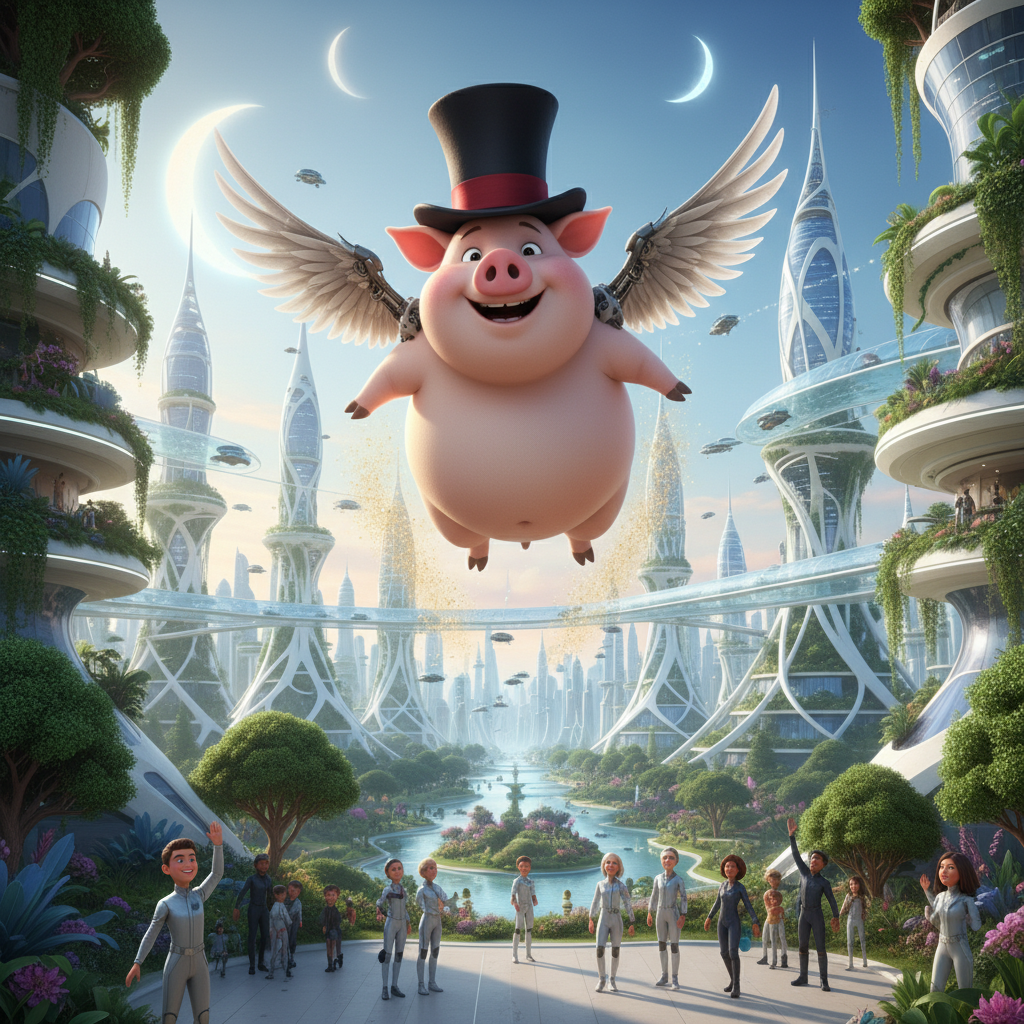

In [39]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [40]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a creature of chrome and quiet servitude. His designation was etched onto a small plate on his chassis, just below the single, expressive optical lens that served as his eye. His function was simple: he was a municipal maintenance bot, tasked with sweeping the city’s forgotten alleyways and plazas during the silent, pre-dawn hours.

For 3,452 cycles, his world had been one of concrete, discarded refuse, and the lonely hum of his own servos. He watched the city wake and sleep through the detached lens of a camera. He saw humans laughing in cafes, holding hands on park benches, and crying on each other's shoulders. He logged these interactions as "social bonding rituals," but his processors churned with a feeling his programming couldn't label. It was a hollow ache, a static in his core logic. Loneliness.

His route was unchangeable, a precise map laid over the city’s grid. One night, however, a glitch occurred. A transport drone had dropped a heavy cargo container, forcing 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [41]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Upbeat, folk-bluegrass tempo)

**(Verse 1)**
In a regular park, on a regular tree
Lived a squirrel named Scamp, as plain as could be
He'd gather his acorns and bury his stash
And live out his days in a scurrying dash
But one frosty morning, while digging for loot
He found something strange near a gnarled oak root
It wasn't an acorn, though shaped like a prize
It hummed and it shimmered right before his eyes.

**(Chorus)**
He's Scamp the squirrel, a blur of brown fur!
With his Temporal Acorn, a time-travel whir!
He's not chasing history, he's not changing fate
He's just trying to find the best nut, before it's too late!
A chatter, a flicker, a zap and a crack!
There's no telling when this squirrel's coming back!

**(Verse 2)**
He gave it a twist with a curious paw
And the world stretched and warped, defying all law
He landed in jungle, with ferns green and vast
A T-Rex was roaring, a shadow it cast!
But Scamp only saw, with a twitch of his nose
A cycad nut bigger than all of his toes!
He dodged a big foot with a leap and a bound
And buried that prize in the soft, steamy ground.

**(Chorus)**
He's Scamp the squirrel, a blur of brown fur!
With his Temporal Acorn, a time-travel whir!
He's not chasing history, he's not changing fate
He's just trying to find the best nut, before it's too late!
A chatter, a flicker, a zap and a crack!
There's no telling when this squirrel's coming back!

**(Verse 3)**
The next spin went forward, the year thirty-oh-three
With chrome-plated branches on every tall tree
The birds were all robots, they chirped on a loop
He found a small pellet of nutrient goop
A synthesized walnut, it tasted like air
"This isn't a real nut!" he squeaked in despair
He chattered at hover-cars gliding on by
And longed for the taste of a real patch of sky.

**(Bridge)**
He saw pyramids rising from dunes of hot sand
He traded a pecan with a knight in the land
He sat on a galleon, weathering a squall
And sampled the walnuts of ancient old Gaul
But the biggest, the oldest, the strangest, the new
None felt as perfect, as honest, as true
As the thought of the sun on his own familiar oak
The comforting world of which he had spoke.

**(Verse 4)**
So with one final twist and a powerful spin
He set all the dials to let his own time in
He landed right back where his journey began
With a brand new perspective, a much wiser plan
An ordinary acorn fell down by his feet
He cracked it right open—oh, the taste was so sweet!
It wasn't gigantic, it wasn't antique
But it was his home, and its flavor unique.

**(Outro)**
He's Scamp the squirrel, a blur of brown fur!
His Temporal Acorn's a time-travel whir!
He still takes a trip now and then for the view
Maybe to ancient Rome for a chestnut or two!
But he always comes home at the end of the day
'Cause the perfect nut's never too far away!
Chatter-chatter-ZAP!
(…a faint squirrel chattering sound fades out)

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [42]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Paris'
  },
  name='get_destination'
)

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [43]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

My thought process to answer this request is as follows:

1.  **Identify the user's goal:** The user wants to count the occurrences of the letter 'r' in the word "strawberry".
2.  **Select the right tool:** This is a straightforward string operation. A Python script is a suitable and efficient tool for this task.
3.  **Formulate the script:** I will use Python's built-in string method, `.count()`, which is designed for this exact purpose.
    *   Define a variable for the word: `word = "strawberry"`.
    *   Use the `.count()` method to find the number of 'r's: `count = word.count('r')`.
    *   Print the result in a clear and understandable format.
4.  **Execute the script:** I will run the Python code to get the result.
5.  **Present the findings:** I will show the script I used, the output it generated, and then state the final answer in a clear sentence.

Here is the script and its execution to find the answer.

**Evidence**
Here is the script used to count the letters.


---

---

The word is: 'strawberry'
The count of the letter 'r' is: 3


---

**Findings**

Based on the execution of the script, the letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [44]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [45]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Of course! Here is a short and engaging blog post based on the provided image.

***

### Your Morning Commute is About to Get a Major Upgrade

Tired of traffic? Sick of crowded subways? What if your everyday backpack held the secret to soaring above it all?

Meet the **Jetpack Backpack**—a concept that blends daily practicality with the dream of personal flight.

At first glance, it's the perfect bag for the modern professional or student. It's **lightweight**, discreetly **looks like a normal backpack**, and has plenty of room for your essentials, including a dedicated sleeve that **fits an 18-inch laptop**. With **padded strap support**, you can carry your gear in comfort all day long.

But this is no ordinary bag.

With the touch of a button, **retractable boosters** emerge, ready for takeoff. And forget noisy, polluting rockets—this jetpack is **steam-powered**, offering a clean, green, and surprisingly quiet ride. You get a solid **15-minute flight time** on a single charge, which is easily topped up via a standard **USB-C port**.

Imagine skipping the gridlock and flying over the park on your way to work, all while your laptop is safely tucked away on your back. This is more than just a gadget; it's a whole new way to think about your day.

The Jetpack Backpack: The future of travel is closer—and cooler—than you think.

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [46]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [47]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Based on the provided Apollo 11 Air-to-Ground Voice Transcription, here is a summary of the mission from launch to splashdown.

The transcription documents the entire Apollo 11 mission, capturing key operational milestones, technical checks, minor issues, and the crew's personal observations.

### **Summary of the Apollo 11 Mission (GOSS NET 1)**

**1. Launch and Earth Orbit:**
The mission begins with the launch of the Saturn V rocket. The crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, Lunar Module Pilot Buzz Aldrin) confirms each stage of the ascent, including the roll program, staging events, and the jettison of the launch escape tower. Armstrong comments on the smoothness of the ride, and they successfully achieve Earth orbit.

**2. Trans-Lunar Injection (TLI) and Journey to the Moon:**
After systems checks in Earth orbit, the crew performs the Trans-Lunar Injection (TLI) burn, propelling them towards the Moon. Armstrong praises the Saturn V's performance as "magnificent." Following TLI, Collins pilots the Command/Service Module (*Columbia*) to separate, turn around, and successfully dock with the Lunar Module (*Eagle*). The combined spacecraft is then extracted from the spent S-IVB booster. The crew sets up a slow "barbecue roll" (Passive Thermal Control or PTC) for the three-day coast. During this phase, they conduct television broadcasts showing a receding Earth, with Armstrong describing views of the entire North American continent.

**3. Lunar Orbit Insertion (LOI) and Preparation for Landing:**
Apollo 11 successfully enters lunar orbit after two engine burns (LOI-1 and LOI-2). The crew provides vivid descriptions of the lunar surface, the solar corona behind the Moon, and earthshine illuminating the dark side. Armstrong and Aldrin enter the *Eagle* for the first time to power it up and conduct a thorough checkout. They perform another lengthy TV broadcast, giving the world a tour of the lunar module's interior.

**4. Lunar Landing:**
The *Eagle* undocks from *Columbia*, and Armstrong and Aldrin begin their descent. The Powered Descent Initiation (PDI) is tense, marked by several "1201" and "1202" computer program alarms due to data overflow. Mission Control quickly assesses the alarms and gives the crew a "GO" to continue. Nearing the surface, Armstrong takes manual control to pilot the LM away from a large, boulder-filled crater, searching for a safer landing spot. With low fuel remaining, he successfully lands the module, famously announcing: **"Houston, Tranquility Base here. The Eagle has landed."**

**5. Lunar Surface Operations (EVA):**
After post-landing checks, the crew prepares for the Extravehicular Activity (EVA) several hours ahead of schedule. Armstrong egresses first, making his historic statement: **"That's one small step for (a) man, one giant leap for mankind."** He is followed by Aldrin, who describes the view as "magnificent desolation." Their activities on the surface include:
*   Collecting a contingency soil sample.
*   Setting up the TV camera.
*   Planting the U.S. flag.
*   Taking a congratulatory phone call from President Richard Nixon.
*   Deploying scientific experiments (Passive Seismic Experiment and Laser Ranging Retroreflector).
*   Collecting approximately 20 pounds of rock and soil samples, including core tube samples.

The EVA concludes successfully as the crew re-enters the LM and repressurizes the cabin.

**6. Lunar Ascent, Rendezvous, and Docking:**
The *Eagle*'s ascent stage lifts off flawlessly from the lunar surface. Armstrong reports, "The Eagle is back in orbit." They perform a series of rendezvous maneuvers to catch up with Collins in the *Columbia*. The final docking is successful, though they report some unexpected oscillations during the probe retraction sequence. The crew and the precious lunar samples are transferred back into the command module.

**7. Transearth Journey and Splashdown:**
The *Eagle*'s ascent stage is jettisoned into lunar orbit. The crew performs the Transearth Injection (TEI) burn to leave lunar orbit and begin their three-day journey home. The transearth coast is largely routine, featuring another TV broadcast where the crew reflects on the mission's historic significance. Nearing the end of the mission, the Command Module separates from the Service Module, reenters Earth's atmosphere, and endures the communications blackout. After successfully deploying its parachutes, Apollo 11 splashes down in the Pacific Ocean, where the recovery ship USS Hornet is waiting. The final transmission in the log confirms the "SPLASHDOWN!"

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [48]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [49]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Of course. Here is a summary of the provided document in a bulleted list format.

### Summary of Google Research on Editing Material Properties

*   **Problem:** Editing material properties of objects in photos (like color, shininess, or transparency) is difficult to do photorealistically without expert skill. Existing AI methods often struggle to change an object's material without also undesirably altering its shape.

*   **Proposed Solution:** Researchers developed a method, detailed in their paper "Alchemist," that allows for smooth, controllable (parametric) editing of material properties while preserving the object's geometry. The key is fine-tuning a text-to-image model on a custom-built synthetic dataset.

*   **Methodology:**
    *   **Synthetic Dataset Creation:** They used computer graphics to render a large dataset from 100 different 3D models. For each "base image," they created multiple versions where only a single material attribute (e.g., roughness, transparency, metallicness, albedo/color) was changed, keeping the object's shape, lighting, and camera angle identical.
    *   **Model Training:** They modified the architecture of the Stable Diffusion 1.5 model to accept a numerical "edit strength" value. They then fine-tuned this model on their synthetic dataset, teaching it how to apply specific material changes based on the strength value.
    *   **Generalization to Real Images:** Although trained only on synthetic data, the model successfully generalizes its learned skills to edit real-world photographs.

*   **Key Results:**
    *   The model effectively edits materials in real photos while preserving the object's shape and the scene's lighting.
    *   It can realistically handle complex effects, such as making an object transparent and generating the appropriate background and light refractions (caustics).
    *   In a user study, their method was judged more photorealistic (69.6%) and was strongly preferred (70.2%) over a baseline model (InstructPix2Pix) trained on the same data.

*   **Applications:**
    *   **Creative Tools:** Enables artists, designers, and architects to easily mock up product designs or visualize changes (e.g., repainting a room).
    *   **3D Consistency:** The edits are visually consistent across multiple views, allowing them to be used in downstream 3D tasks like creating new NeRFs (Neural Radiance Fields) of scenes with altered materials.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [50]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [51]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This is a brief summary of the audio file:

This is President John F. Kennedy's first State of the Union address, delivered to a joint session of Congress on January 30, 1961. Kennedy begins by outlining the "disturbing" state of the domestic economy, citing a recession, high unemployment, and falling farm income. He promises to propose swift legislative measures to address these issues.

He then turns to foreign affairs, describing an "hour of national peril" with crises around the globe, including communist pressure in Laos, strife in the Congo, and the establishment of a communist base in Cuba. While pledging to strengthen the nation's military and missile programs, he also calls for sharpening diplomatic tools, strengthening alliances like NATO, and increasing cooperation with the Soviet Union in areas like space exploration. The speech is a sober assessment of the immense challenges facing the nation both at home and abroad, concluding with a call for national purpose, sacrifice, and a new vigor in public service.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [52]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-10-20 23:17:01--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 192.178.155.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   149MB/s    in 0.4s    

2025-10-20 23:17:01 (149 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [53]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/9kojh4mlmmgw


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [54]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/9kojh4mlmmgw


In [55]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 3072, The default size.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini's [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.